In [1]:
# Simple Regression Exercise
import argparse
import sys

import numpy as np
from matplotlib import pyplot as plt
import numpy.linalg as la

In [2]:
# Compute the sample mean and standard deviations for each feature (column) across the training examples (rows) from the data matrix X.
def mean_std(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return mean, std

In [3]:
# Standardize the features of the examples in X by subtracting their mean and dividing by their standard deviation, as provided in the parameters.
def standardize(X, mean, std):
    S = (X - mean) / std
    return S

In [4]:
# Read data matrix X and labels t from text file.
def read_data(file_name):
    data = np.loadtxt(file_name)
    X = data[:, :-1]  # Features are all columns except the last one
    t = data[:, -1]   # Last column is the target (house price)
    return X, t

In [5]:
# Implement gradient descent algorithm to compute w = [w0, w1].
def train(X, t, eta, epochs):
    costs = []
    ep = []
    w = np.zeros(X.shape[1])  # Initialize weights to zeros
    N = X.shape[0]  # Number of training examples

    # Gradient descent loop
    for epoch in range(epochs + 1):
        # Compute predicted values
        y_pred = np.dot(X, w)

        # Compute cost function
        cost = compute_cost(X, t, w)
        costs.append(cost)
        ep.append(epoch)

        # Compute gradient
        grad = compute_gradient(X, t, w)

        # Update weights
        w -= (eta / N) * np.dot(X.T, y_pred - t)

        # Print progress every 10 epochs
        if epoch % 10 == 0:
            print(f'Epoch {epoch}: Cost = {cost}')

    return w, ep, costs

In [6]:
# Compute RMSE on dataset (X, t).
def compute_rmse(X, t, w):
    y_pred = np.dot(X, w)
    rmse = np.sqrt(np.mean((y_pred - t) ** 2))
    return rmse

In [7]:
# Compute objective function (cost) on dataset (X, t).
def compute_cost(X, t, w):
    y_pred = np.dot(X, w)
    cost = np.mean((y_pred - t) ** 2) / 2
    return cost

In [8]:
# Compute gradient of the objective function (cost) on dataset (X, t).
def compute_gradient(X, t, w):
    grad = np.dot(X.T, np.dot(X, w) - t)
    return grad

In [29]:
##======================= Main program =======================##
parser = argparse.ArgumentParser('Simple Regression Exercise.')
parser.add_argument('-i', '--input_data_dir',
                    type=str,
                    default='../content',
                    help='Directory for the simple houses dataset.')
FLAGS, unparsed = parser.parse_known_args()

# Read the training and test data.
Xtrain, ttrain = read_data(FLAGS.input_data_dir + "/simple_train.txt")
Xtest, ttest = read_data(FLAGS.input_data_dir + "/simple_test.txt")

# Compute mean and standard deviation of training data
mean, std = mean_std(Xtrain)

# Standardize the training and test features using the mean and std computed over training data.
Xtrain_std = standardize(Xtrain, mean, std)
Xtest_std = standardize(Xtest, mean, std)

# Add a column of ones for bias features to each training and test example.
Xtrain_std = np.hstack((np.ones((Xtrain_std.shape[0], 1)), Xtrain_std))
Xtest_std = np.hstack((np.ones((Xtest_std.shape[0], 1)), Xtest_std))

# Computing parameters for each training method for eta=0.1 and 200 epochs
eta = 0.1
epochs = 200

w, eph, costs = train(Xtrain_std, ttrain, eta, epochs)

Epoch 0: Cost = 38779026900.0
Epoch 10: Cost = 6518333498.253418
Epoch 20: Cost = 2596186319.697016
Epoch 30: Cost = 2119344786.9162884
Epoch 40: Cost = 2061371988.5909686
Epoch 50: Cost = 2054323849.7133222
Epoch 60: Cost = 2053466960.5674884
Epoch 70: Cost = 2053362782.851783
Epoch 80: Cost = 2053350117.2736247
Epoch 90: Cost = 2053348577.435004
Epoch 100: Cost = 2053348390.2265754
Epoch 110: Cost = 2053348367.466401
Epoch 120: Cost = 2053348364.699296
Epoch 130: Cost = 2053348364.36288
Epoch 140: Cost = 2053348364.3219793
Epoch 150: Cost = 2053348364.3170066
Epoch 160: Cost = 2053348364.3164027
Epoch 170: Cost = 2053348364.3163292
Epoch 180: Cost = 2053348364.31632
Epoch 190: Cost = 2053348364.316319
Epoch 200: Cost = 2053348364.3163188


In [30]:
# Print model parameters.
print('Params GD: ', w)

# Print cost and RMSE on training data.
print('Training RMSE: %0.2f.' % compute_rmse(Xtrain_std, ttrain, w))
print('Training cost: %0.2f.' % compute_cost(Xtrain_std, ttrain, w))

# Print cost and RMSE on test data.
print('Test RMSE: %0.2f.' % compute_rmse(Xtest_std, ttest, w))
print('Test cost: %0.2f.' % compute_cost(Xtest_std, ttest, w))

Params GD:  [254449.99983844  93308.92004686]
Training RMSE: 64083.51.
Training cost: 2053348364.32.
Test RMSE: 65773.19.
Test cost: 2163056350.74.


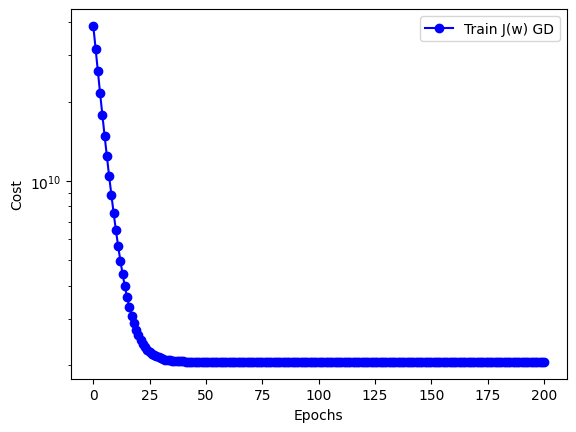

In [33]:
# Plotting epochs vs. cost for gradient descent methods
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.yscale('log')
plt.plot(eph, costs, 'bo-', label='Train J(w) GD')
plt.legend()
plt.show()

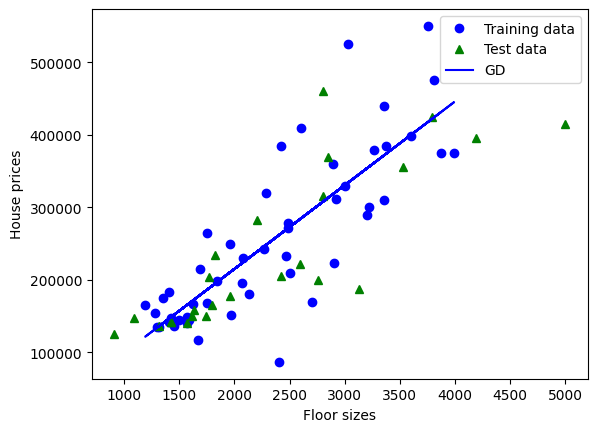

In [34]:
# Plotting linear approximation for training data
plt.xlabel('Floor sizes')
plt.ylabel('House prices')
plt.plot(Xtrain[:, 0], ttrain, 'bo', label='Training data')
plt.plot(Xtest[:, 0], ttest, 'g^', label='Test data')
plt.plot(Xtrain[:, 0], np.dot(Xtrain_std, w), 'b', label='GD')
plt.legend()
plt.show()